# DIALOGUE analysis

We continue with the BS solver output.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pertpy as pt
import scanpy as sc
import anndata as ad

In [3]:
import pickle as pkl

with open("dialogue_bs.pkl", "rb") as file:
    dlg_bs_results = pkl.load(file)

In [4]:
adata = ad.read_h5ad("dialogue_bs.h5ad")

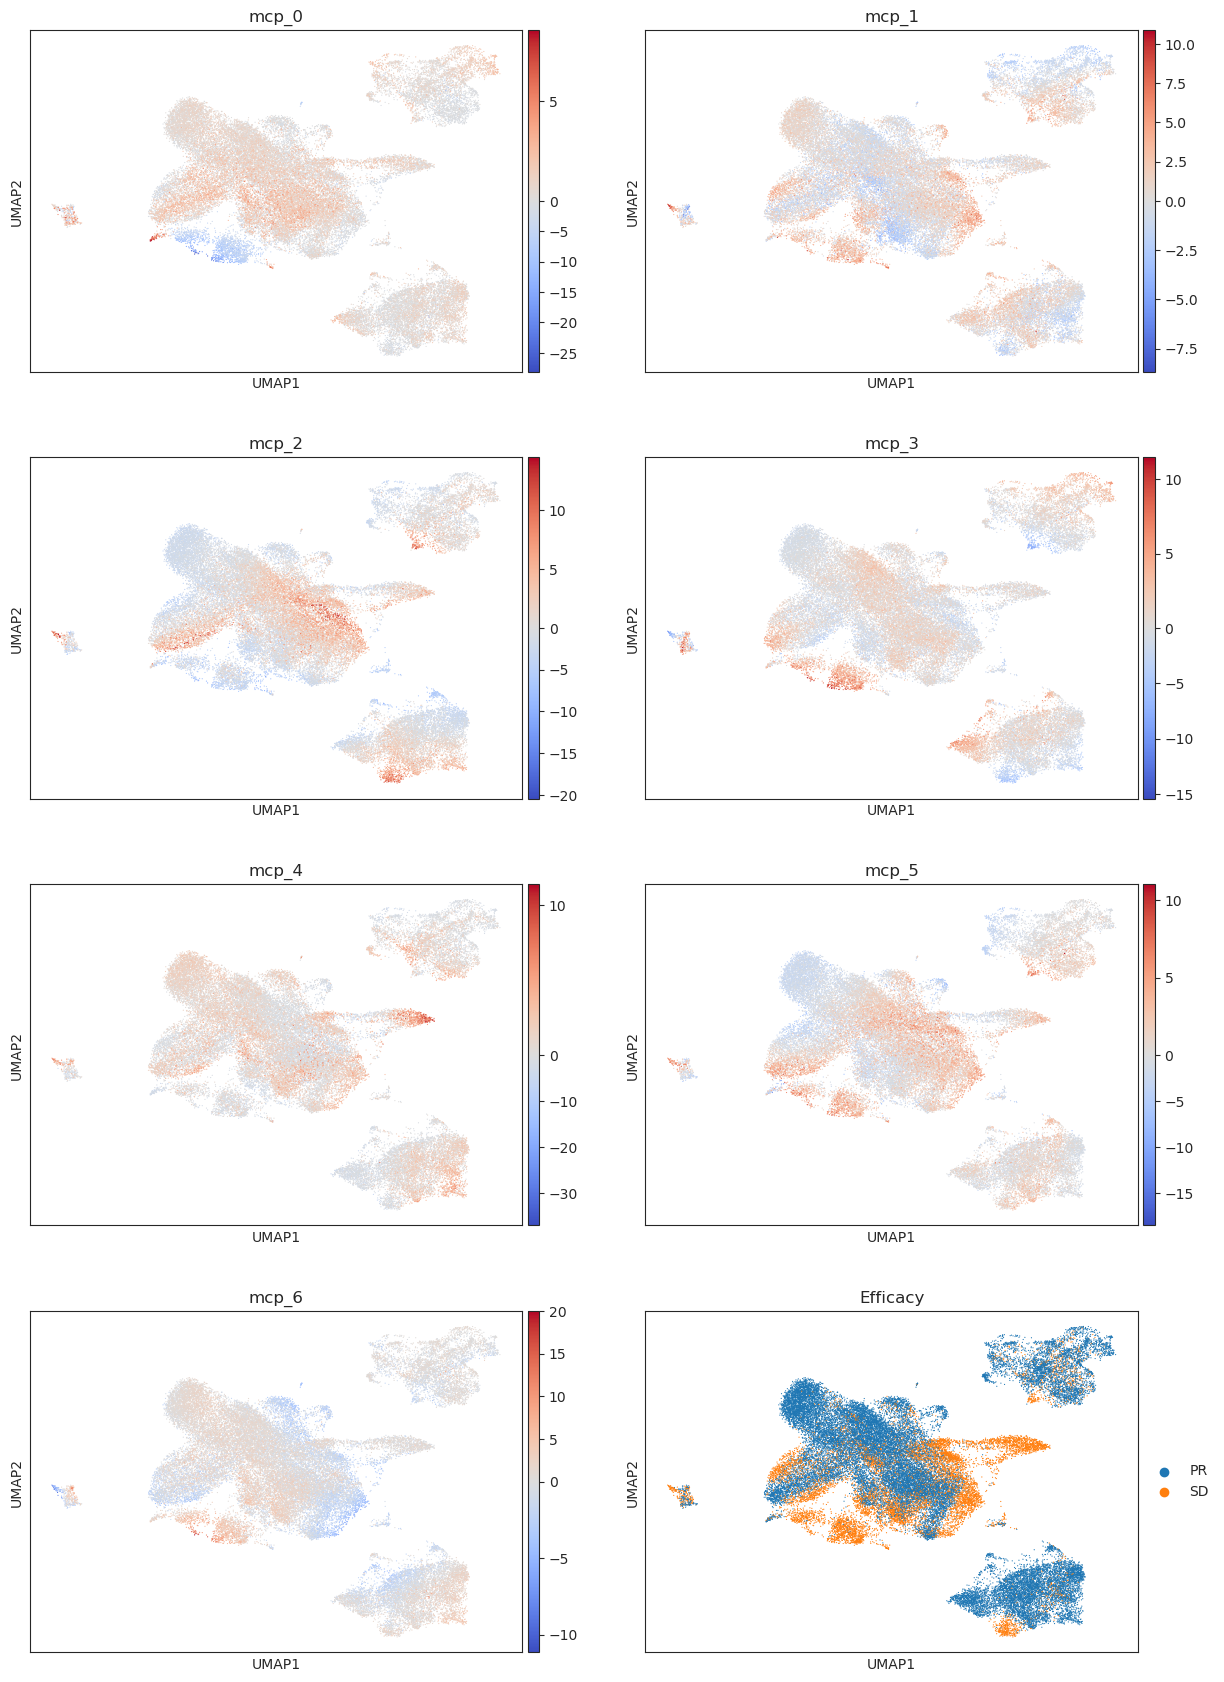

In [5]:
sc.pl.umap(
    adata,
    color=["mcp_0", "mcp_1", "mcp_2", "mcp_3", "mcp_4", "mcp_5", "mcp_6", "Efficacy"],
    ncols=2,
    cmap="coolwarm",
    vcenter=0,
)

In [6]:
dl = pt.tl.Dialogue(
    sample_id="Sample", celltype_key="Cluster", n_counts_key="n_counts", n_mpcs=10
)

In [7]:
test_results = dl.test_association(
    adata, condition_label="Efficacy", conditions_compare=("PR", "SD")
)

In [8]:
pvals_adj = test_results["pvals_adj"]
pvals_adj

,mcp_0,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5,mcp_6,mcp_7,mcp_8,mcp_9
t_Bmem-CD27,0.129339,0.687964,0.856068,0.987847,0.912574,0.197173,0.963426,0.846993,0.970858,0.321582
t_CD4_Tcm-LMNA,0.129339,0.449370,0.856068,0.987847,0.912574,0.164056,0.963426,0.454509,0.970858,0.321582
t_CD4_Treg-FOXP3,0.129339,0.609103,0.907363,0.987847,0.912574,0.164056,0.963426,0.782977,0.970858,0.347124
t_CD8_MAIT-KLRB1,0.129339,0.507163,0.856068,0.987847,0.912574,0.164056,0.963426,0.782977,0.970858,0.321582
t_CD8_Tem-GZMK,0.129339,0.478565,0.856068,0.987847,0.912574,0.164056,0.963426,0.782977,0.983733,0.321582
t_CD8_Trm-ZNF683,0.129339,0.449370,0.981700,0.987847,0.912574,0.164056,0.963426,0.506389,0.970858,0.347124
t_Tn-LEF1,0.129339,0.449370,0.856068,0.987847,0.912574,0.164056,0.963426,0.454509,0.970858,0.321582
t_mono-FCN1,0.129339,0.478565,0.856068,0.987847,0.912574,0.056767,0.963426,0.846993,0.970858,0.321582
t_pB-IGHG1,0.129339,0.449370,0.856068,0.987847,0.912574,0.056767,0.963426,0.782977,0.970858,0.321582


We are interested in mcp 5

In [9]:
ct_subs = dlg_bs_results["ct_subs"]

<Axes: xlabel='Cluster', ylabel='mcp_5'>

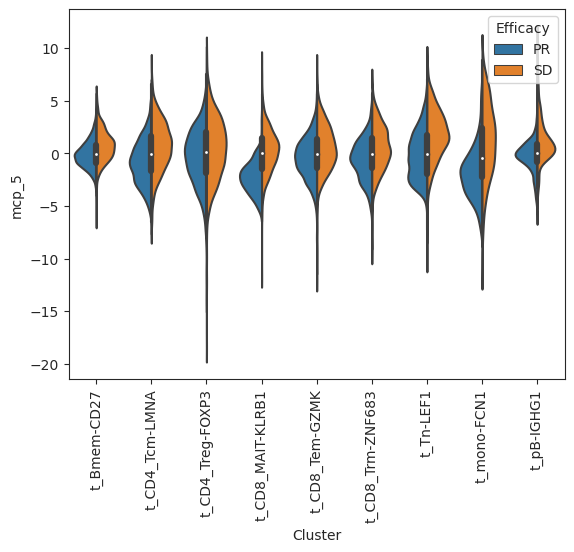

In [10]:
dl.plot_split_violins(adata, split_key="Efficacy", celltype_key="Cluster", mcp="mcp_5")

In [11]:
mini = adata[
    adata.obs["Cluster"].isin(
        dlg_bs_results["pvals"][
            dlg_bs_results["pvals_adj"]["mcp_5"]
            == dlg_bs_results["pvals_adj"]["mcp_5"].min()
        ].index.values
    )
].copy()

In [12]:
mini.obs = mini.obs.replace({"SD": "Stable disease", "PR": "Partial response"})
mini.obs = mini.obs.replace(
    {
        "t_CD4_Tcm-LMNA": "CD4 Tcm cells",
        "t_pB-IGHG1": "Plasma B cells",
        "t_Bmem-CD27": "Memory B cells",
        "t_CD8_MAIT-KLRB1": "CD8 MAIT cells",
        "t_Tn-LEF1": "Naive T cells",
    }
)

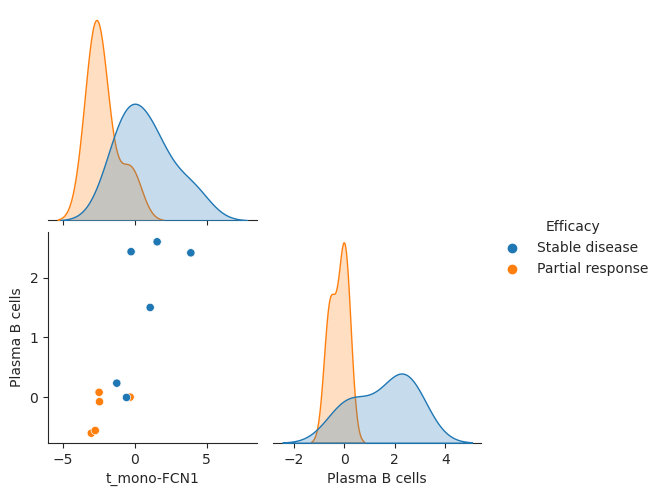

In [13]:
dl.plot_pairplot(
    mini,
    celltype_key="Cluster",
    color="Efficacy",
    mcp="mcp_5",
    sample_id="Sample",
)